In [ ]:
import numpy as np
from regressioninc.testing.complex import ComplexGrid, add_gaussian_noise
from regressioninc.math import geometric_median
import matplotlib.pyplot as plt

grid = ComplexGrid(r1=-1, r2=1, nr=3, i1=-1, i2=1, ni=3)
pts = grid.flat_grid()
print(pts.shape)
median = geometric_median(pts)

plt.figure()
plt.scatter(pts.real, pts.imag)
plt.scatter(median.real, median.imag, c="r")





In [ ]:
noisy_pts = add_gaussian_noise(np.squeeze(pts), [0, 0], [0.5, 0.5]) 
print(noisy_pts.shape)
median = geometric_median(noisy_pts)

plt.figure()
plt.scatter(noisy_pts.real, noisy_pts.imag)
plt.scatter(median.real, median.imag, c="r")

(2.9617769034978974-1.9882210431738532j)


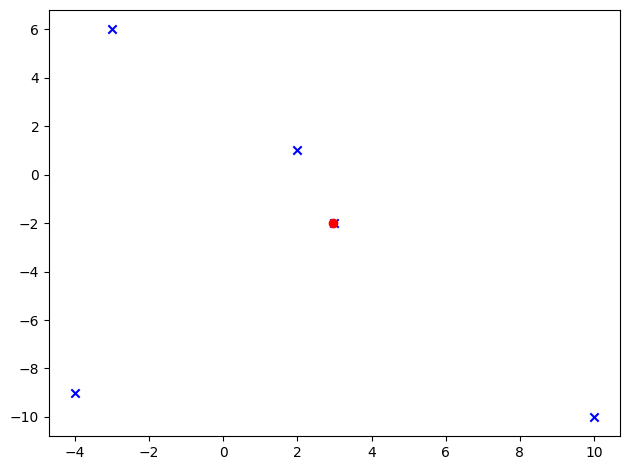

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from regressioninc.math import geometric_median
arr = np.array([3 - 2j, -4 - 9j, 2 + 1j, -3 + 6j])
med = geometric_median(arr)
print(med)
plt.scatter(arr.real, arr.imag, c="b", marker="x") # doctest: +SKIP
plt.scatter(med.real, med.imag, c="r", marker="o") # doctest: +SKIP
plt.tight_layout() # doctest: +SKIP
plt.show() # doctest: +SKIP